In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [10]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

EDA

In [7]:
import seaborn as sns

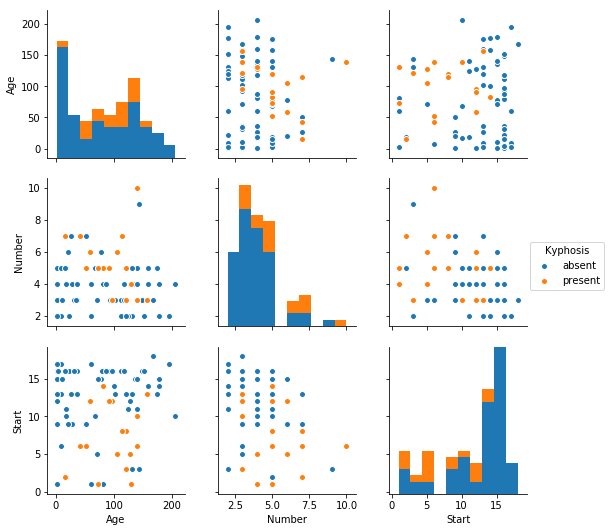

In [9]:
sns.pairplot(df,hue='Kyphosis')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

Decision Tree Alogo

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
confu_metrics = confusion_matrix(y_test,predictions)

In [40]:
confu_metrics

array([[16,  3],
       [ 3,  3]], dtype=int64)

In [41]:
accuracy = accuracy_score(y_test,predictions)

In [42]:
accuracy

0.76000000000000001

In [43]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.84      0.84      0.84        19
    present       0.50      0.50      0.50         6

avg / total       0.76      0.76      0.76        25



In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
score = cross_val_score(dtree,X_test,y_test,cv=5)

In [46]:
np.mean(score)

0.58333333333333326

Tree visualization

In [47]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

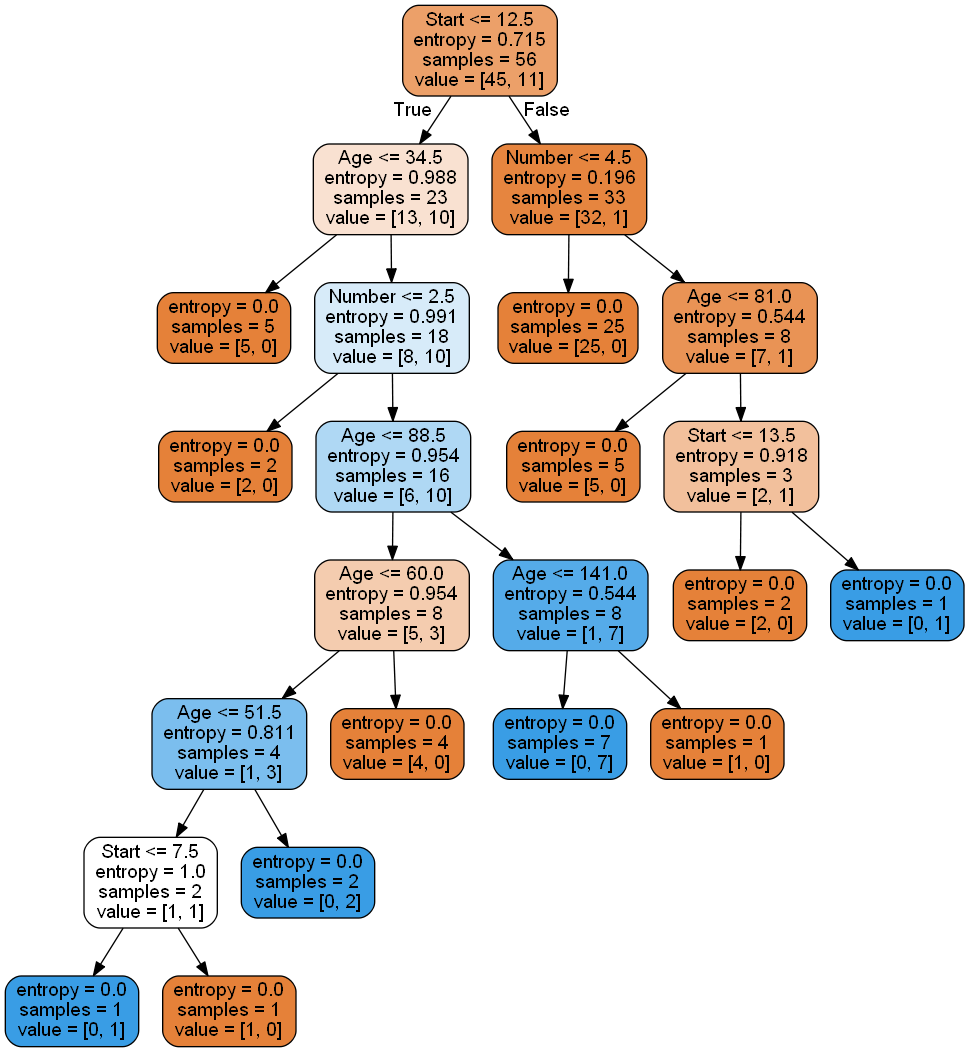

In [48]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())